In [1]:
import numpy as np
import pandas as pd

In [3]:

df = pd.read_csv('spam.csv', encoding='latin-1')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
##1 . Data Cleaning
## 2. EDA
## 3. Text Preprocessing
## 4 . Model building
## 5 . Evaluation
## 6. Improvement
## 7. Website
## 8. Deploy

## 1. Data Cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [29]:
## drop last 3 cols
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [23]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
## renaming the cols
df = df.rename(columns={'v1':'target','v2':'text'})

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [33]:
df['target'] = encoder.fit_transform(df['target'])

In [34]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
### Missing Value
df.isnull().sum()

target    0
text      0
dtype: int64

In [36]:
## check for duplicate values
df.duplicated().sum()

403

In [43]:
## remove duplicates
df = df.drop_duplicates(keep='first')

In [45]:
df.duplicated().sum()

0

In [46]:
df.shape


(5169, 2)

### 2.EDA

In [47]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

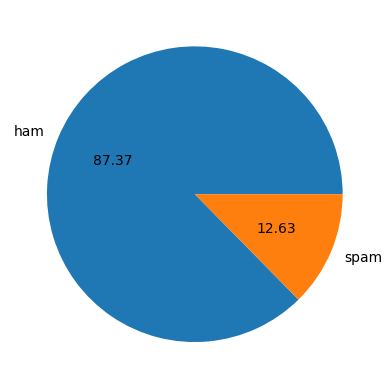

In [50]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [51]:
## Data is Imbalanced


In [54]:
import nltk

In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
df['num_character'] = df['text'].apply(len)

In [61]:
df['num_character'].head()

0    111
1     29
2    155
3     49
4     61
Name: num_character, dtype: int64

In [85]:
## num of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [86]:
df.head()

,target,text,num_character,num_words,sen_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [89]:
## num of sentences
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [90]:
df.head()

,target,text,num_character,num_words,sen_words,num_senteces,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2,2
1,0,Ok lar... Joking wif u oni...,29,8,2,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2,2
3,0,U dun say so early hor... U c already then say...,49,13,1,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,1


In [96]:
# df = df.drop(columns={'sen_words','num_senteces'},inplace=True)

In [97]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [101]:
# ham
df[df['target'] == 0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [102]:
# spam
df[df['target'] == 1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [103]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

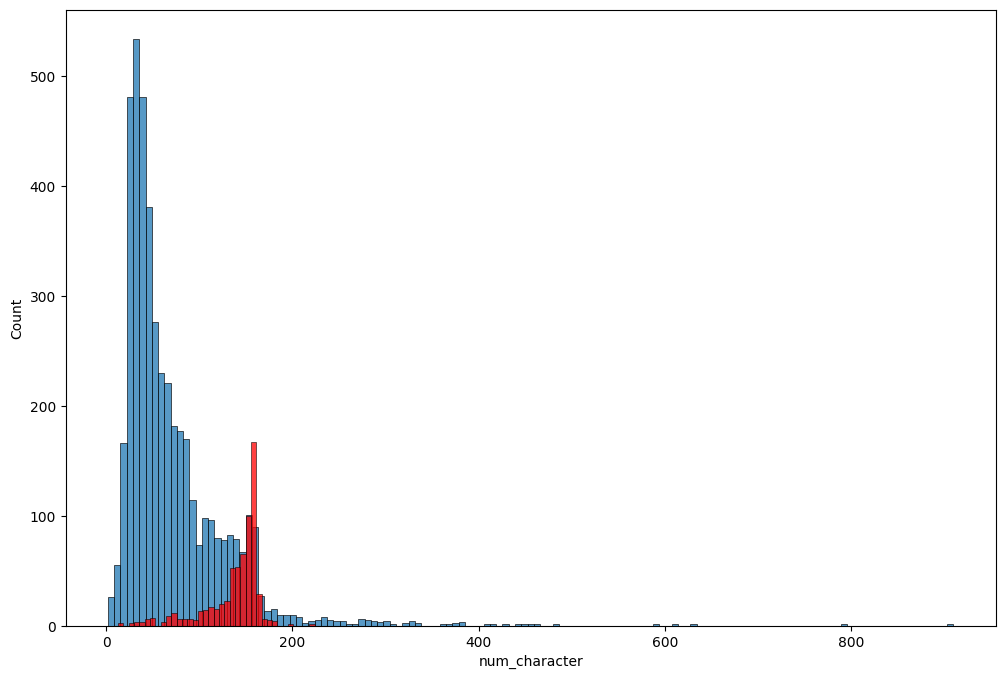

In [108]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0] ['num_character'])
sns.histplot(df[df['target'] == 1] ['num_character'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

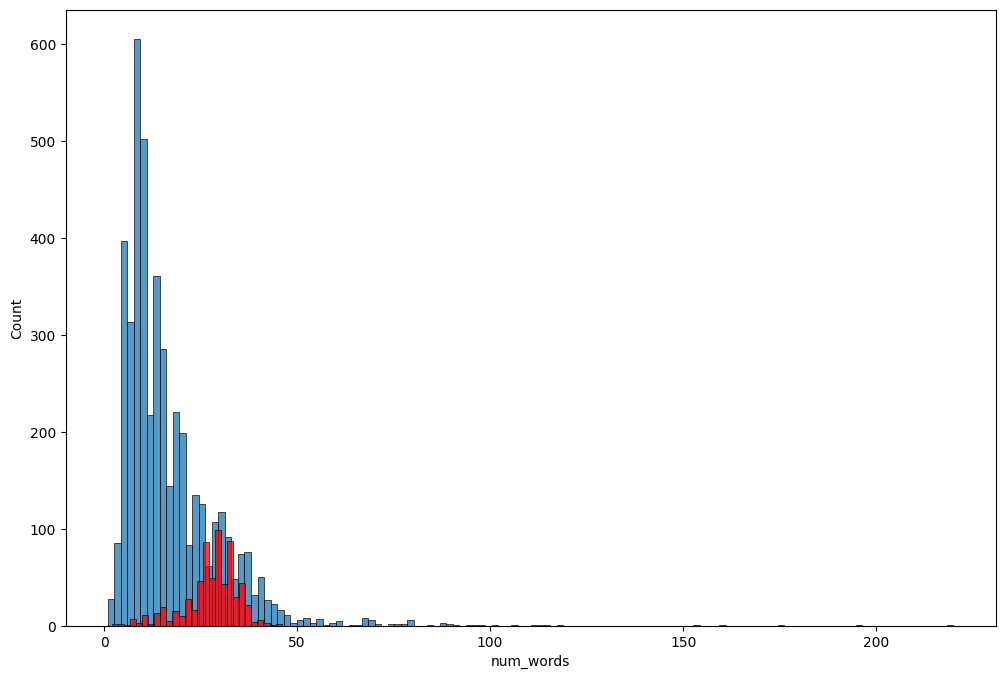

In [109]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0] ['num_words'])
sns.histplot(df[df['target'] == 1] ['num_words'],color='red')

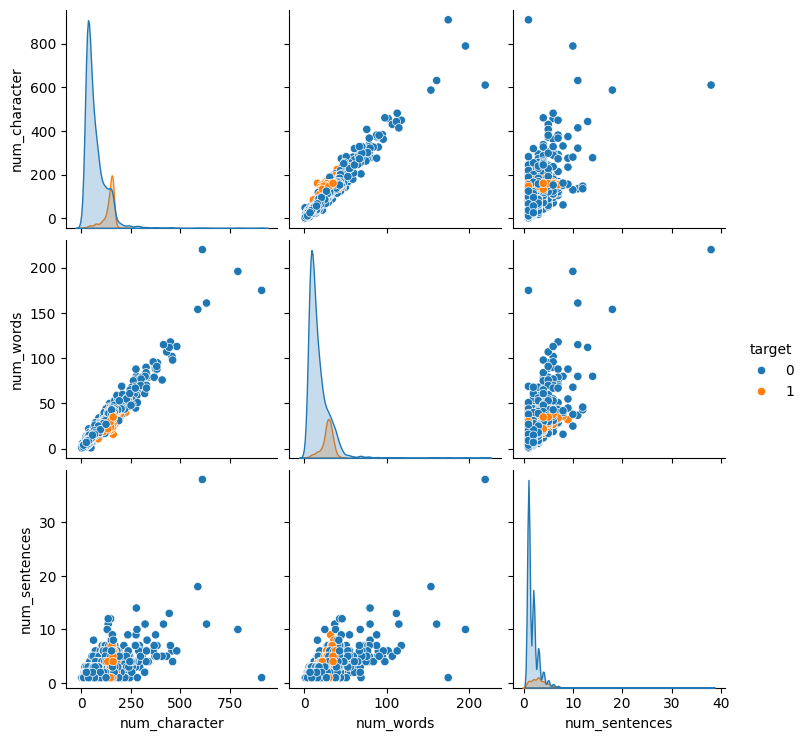

In [110]:
sns.pairplot(df,hue='target')

### 3.Data Preprocessing
- lower case
- Tokenization
- Removing Special characters
- Removing stop words and punctation
- Stemming

In [161]:
def transform_text(text):
   text = text.lower()
   text = nltk.word_tokenize(text)
   y = []
   for i in text:
       if i.isalnum():
          y.append(i)
   text = y[:]
   y.clear()
   for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

   text = y[:]
   y.clear()
   for i in text:
       y.append(ps.stem(i))
   return " ".join(y)

In [162]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [163]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [164]:
transform_text('I loved the YT lectures on Machine Learning. How about you ?')

'love yt lectur machin learn'

In [165]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [166]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('looking')

'look'

In [171]:
 df['transformed_text'] =  df['text'].apply(transform_text)

In [172]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [211]:
spam_corpus = []
for msg in df[df['target'] == 1] ['transformed_text'].tolist():
     for word in msg.split():
         spam_corpus.append(word)

In [212]:
len(spam_corpus)

9939

In [213]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [214]:
ham_corpus = []
for msg in df[df['target'] == 0] ['transformed_text'].tolist():
     for word in msg.split():
         ham_corpus.append(word)

In [215]:
len(ham_corpus)

35404

In [216]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


## 4. Model Building

In [267]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [268]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [269]:
X.shape

(5169, 6708)

In [270]:
y = df['target'].values

In [271]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [274]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [275]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [276]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [277]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [278]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [279]:
##tfidf-->>mnb

In [280]:
## model imporve
# 1. change the max_features parameter of TfIdf

In [281]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))